In [1]:
import numpy as np
import numpy, scipy.optimize
import matplotlib.pyplot as plt

import logging
import json

from flask import request, jsonify;

import numpy, scipy.optimize
import numpy as np
# import matplotlib.pyplot as plt


logger = logging.getLogger(__name__)

# @app.route('/technical-analysis', methods=['POST'])
# def technical_analysis():
#     data = request.get_json()
#     logging.info("data sent for evaluation {}".format(data))
def technical_analysis(data):
    
    result = []
    losses = []
    fitfuncs = []
    for i,ar in enumerate(data):
        candidates = []
        for _ in range(20):
            try:
                candidates.append(optimise_case(ar, casenum = i))
            except Exception as e: 
                print(e)
            # if candidates != [] and candidates[-1]["loss"] < 20:
            #     break
        if len(candidates) == 0:
            result.append([100,1099])
        else:
            # print(candidates, "candidates")
            indice = np.argmin([c["loss"] for c in candidates])
            result.append(candidates[indice]["ans"])
            print(candidates[indice]["loss"])
            losses.append(candidates[indice]["loss"])
            fitfuncs.append(candidates[indice]["fitfunc"])
        print(losses)
        
    return result, losses, fitfuncs

def fit_sin_base(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy_ = [yyy for yyy in yy]
    yy = numpy.array(yy_)

    yy = numpy.array(yy)
    # if np.random.randn() > 0.5:
    #     yy += np.random.randn(yy.shape[0])
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    # plt.plot(Fyy[1:])
    # plt.show()
    guess_index = numpy.argmax(Fyy[4:len(Fyy)//2])+4
    guess_freq = abs(ff[guess_index]+4)   # excluding the zero frequency "peak", which is related to offset
    # print(guess_index)
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, np.random.randn(),
                        #  np.random.randn(), 2.*numpy.pi*guess_freq, -0.01,
                        #  np.random.randn(), 2.*numpy.pi*guess_freq, +0.01,
                        numpy.mean(yy[:len(yy)//2]) - numpy.mean(yy[len(yy)//2:]) / (len(yy)//2), 
                        guess_offset])

    def sinfunc(t, 
                A1, w1, p1, 
                # A2, w2, p2,
                # A3, w3, p3, 
                k, c):  return (A1 * numpy.sin(w1*t + p1) + 
                                # A2 * numpy.sin(w2*t + p2) +
                                # A3 * numpy.sin(w3*t + p3) +
                                k*t + c)
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    (A1, w1, p1,
    #  A2, w2, p2, 
    #  A3, w3, p3,
    k, c) = popt
    
    fitfunc = lambda t: sinfunc(t, *popt)
    loss = np.sum(np.abs(np.array([fitfunc(t) for t in tt]) -  yy_))

    fitfunc = lambda t: sinfunc(t, *popt)
    return {"loss": loss, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

def fit_sin_base2(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy_ = [yyy for yyy in yy]
    yy = numpy.array(yy_)

    yy = numpy.array(yy)
    # if np.random.randn() > 0.5:
    #     yy += np.random.randn(yy.shape)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    # plt.plot(Fyy[1:])
    # plt.show()
    guess_index = numpy.argmax(Fyy[4:len(Fyy)//2])+4
    guess_freq = abs(ff[guess_index]+4)   # excluding the zero frequency "peak", which is related to offset
    # print(guess_index)
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, np.random.randn(),
                         np.random.randn(), 2.*numpy.pi*guess_freq, -0.01,
                        #  np.random.randn(), 2.*numpy.pi*guess_freq, +0.01,
                        numpy.mean(yy[:len(yy)//2]) - numpy.mean(yy[len(yy)//2:]) / (len(yy)//2), 
                        guess_offset])

    def sinfunc(t, 
                A1, w1, p1, 
                A2, w2, p2,
                # A3, w3, p3, 
                k, c):  return (A1 * numpy.sin(w1*t + p1) + 
                                A2 * numpy.sin(w2*t + p2) +
                                # A3 * numpy.sin(w3*t + p3) +
                                k*t + c)
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    (A1, w1, p1,
     A2, w2, p2, 
    #  A3, w3, p3,
    k, c) = popt
    
    fitfunc = lambda t: sinfunc(t, *popt)
    loss = np.sum(np.abs(np.array([fitfunc(t) for t in tt]) -  yy_))

    fitfunc = lambda t: sinfunc(t, *popt)
    return {"loss": loss, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}


def fit_sin_base3(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy_ = [yyy for yyy in yy]
    yy = numpy.array(yy_)

    yy = numpy.array(yy)
    # if np.random.randn() > 0.5:
    #     yy += np.random.randn(yy.shape)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    # plt.plot(Fyy[1:])
    # plt.show()
    guess_index = numpy.argmax(Fyy[4:len(Fyy)//2])+4
    guess_freq = abs(ff[guess_index]+4)   # excluding the zero frequency "peak", which is related to offset
    # print(guess_index)
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, np.random.randn(),
                         np.random.randn(), 2.*numpy.pi*guess_freq*np.random.uniform(), -0.01,
                         np.random.randn(), 2.*numpy.pi*guess_freq*2*np.random.uniform(), +0.01,
                        numpy.mean(yy[:len(yy)//2]) - numpy.mean(yy[len(yy)//2:]) / (len(yy)//2), 
                        guess_offset])

    def sinfunc(t, 
                A1, w1, p1, 
                A2, w2, p2,
                A3, w3, p3, 
                k, c):  return (A1 * numpy.sin(w1*t + p1) + 
                                A2 * numpy.sin(w2*t + p2) +
                                A3 * numpy.sin(w3*t + p3) +
                                k*t + c)
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    (A1, w1, p1,
     A2, w2, p2, 
     A3, w3, p3,
    k, c) = popt
    
    fitfunc = lambda t: sinfunc(t, *popt)
    loss = np.sum(np.abs(np.array([fitfunc(t) for t in tt]) -  yy_))

    fitfunc = lambda t: sinfunc(t, *popt)
    return {"loss": loss, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}



def fit_sin_base4(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy_ = [yyy for yyy in yy]
    yy = numpy.array(yy_)

    yy = numpy.array(yy)
    # if np.random.randn() > 0.5:
    #     yy += np.random.randn(yy.shape)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    # plt.plot(Fyy[1:])
    # plt.show()
    guess_index = numpy.argmax(Fyy[4:len(Fyy)//2])+4
    guess_freq = abs(ff[guess_index]+4)   # excluding the zero frequency "peak", which is related to offset
    # print(guess_index)
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, np.random.randn(),
                         np.random.randn(), 2.*numpy.pi*(0.1)*np.random.uniform(), np.random.uniform(),
                         np.random.randn(), 2.*numpy.pi*(0.05)*np.random.uniform(), np.random.uniform(),
                         np.random.randn(), 2.*numpy.pi*(0.08)*np.random.uniform(), np.random.uniform(),
                        np.random.uniform() + (numpy.mean(yy[:len(yy)//2]) - numpy.mean(yy[len(yy)//2:])) / (len(yy)//2), 
                        guess_offset])

    def sinfunc(t, 
                A1, w1, p1, 
                A2, w2, p2,
                A3, w3, p3, 
                A4, w4, p4, 
                k, c):  return (A1 * numpy.sin(w1*t + p1) + 
                                A2 * numpy.sin(w2*t + p2) +
                                A3 * numpy.sin(w3*t + p3) +
                                A4 * numpy.sin(w4*t + p4) +
                                k*t + c)
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    (A1, w1, p1,
     A2, w2, p2, 
     A3, w3, p3,
     A4, w4, p4,
    k, c) = popt
    
    fitfunc = lambda t: sinfunc(t, *popt)
    loss = np.sum(np.abs(np.array([fitfunc(t) for t in tt]) -  yy_))

    fitfunc = lambda t: sinfunc(t, *popt)
    return {"loss": loss, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}







def optimise_case(arr_in, casenum = 1):

    larger_range = 1099

    yy = arr_in
    tt = range(len(yy))

    randnum = np.random.randn()

    if casenum == 0:
        res = fit_sin_base(tt,yy)
    if casenum == 1:
        if randnum > 0:
            res = fit_sin_base(tt,yy)
        else:
            res = fit_sin_base2(tt,yy) 
    if casenum == 2:
        if randnum < -1.5:
            res = fit_sin_base(tt,yy)
        elif randnum < -0.5:
            res = fit_sin_base2(tt,yy) 
        else:
            res = fit_sin_base3(tt,yy) 
    else:
        if randnum < -1.5:
            res = fit_sin_base(tt,yy)
        elif randnum < -1.0:
            res = fit_sin_base2(tt,yy)
        elif randnum < -0:
            res = fit_sin_base3(tt,yy)
        else:
            res = fit_sin_base4(tt,yy)
    

    # plt.plot(tt, yy, "-k", label="y", linewidth=2)
    # # plt.plot(tt, diff, label="y", linewidth=2)
    # plt.plot(tt, res["fitfunc"](tt), "r-", label="y fit curve", linewidth=2)
    # plt.legend(loc="best")
    # plt.show()

    preds = list(res["fitfunc"](range(larger_range)))
    moves = [a>b for a,b in zip(preds[1:],preds[:-1])]
    answer = []
    for i,_ in enumerate(moves[:-1]):
        if moves[i] != moves[i+1]:
            if moves[i]:
                answer.append(i)
            else:
                answer.append(-i)

    # plt.figure(figsize=(14,3))
    # plt.plot(tt, yy, "-k", label="y", linewidth=2)
    # plt.plot(range(larger_range), res["fitfunc"](range(larger_range)), "r-", label="y fit curve", linewidth=2)
    # plt.legend(loc="best")
    # for xc in answer:
    #     if xc > 0 and xc < 200:
    #         plt.axvline(x=xc+1)
    # plt.show()

    ans = []
    for a in answer:
        if abs(a) > 100:
            ans.append(a)
    if ans[0] > 0:
        del ans[0]
    # no need to fix the end

    ans = [abs(a) for a in ans]

    # plt.figure(figsize=(14,3))
    # plt.plot(tt, yy, "-k", label="y", linewidth=2)
    # plt.plot(range(larger_range), res["fitfunc"](range(larger_range)), "r-", label="y fit curve", linewidth=2)
    # plt.legend(loc="best")
    # for xc in ans:
    #     if xc > 0 and xc < 200:
    #         plt.axvline(x=xc+1)
    # plt.show()
    
    return {"ans" : ans, "loss": res["loss"], "fitfunc": res["fitfunc"]}




In [2]:
arr = [[259, 260, 261, 262, 262, 263, 263, 263, 263, 263, 262, 261, 260, 259, 258, 257, 256, 254, 253, 253, 252, 252, 252, 252, 253, 253, 254, 255, 256, 257, 258, 259, 260, 261, 261, 262, 262, 261, 261, 260, 259, 258, 257, 256, 254, 253, 252, 251, 251, 250, 250, 250, 251, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 260, 260, 260, 259, 259, 258, 257, 256, 254, 253, 252, 251, 250, 249, 249, 249, 249, 249, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 258, 258, 258, 258, 257, 256, 255, 254, 253], [286, 290, 294, 297, 300, 301, 301, 300, 298, 295, 291, 287, 283, 279, 276, 273, 271, 271, 271, 273, 275, 278, 281, 284, 287, 290, 292, 293, 293, 293, 292, 290, 288, 286, 284, 282, 281, 280, 279, 279, 279, 280, 281, 282, 283, 283, 284, 284, 283, 282, 281, 280, 279, 279, 278, 278, 278, 279, 281, 282, 284, 286, 288, 290, 291, 291, 290, 289, 287, 284, 281, 278, 275, 272, 269, 268, 267, 268, 269, 272, 275, 279, 283, 287, 290, 293, 295, 296, 296, 294, 292, 288, 284, 280, 275, 271, 268, 265, 264, 263], [236, 244, 250, 255, 256, 255, 251, 246, 241, 237, 236, 237, 241, 246, 252, 258, 263, 264, 263, 259, 253, 245, 238, 233, 230, 229, 232, 236, 241, 246, 249, 249, 247, 242, 236, 229, 222, 218, 216, 217, 220, 226, 232, 237, 240, 241, 239, 234, 228, 221, 216, 212, 211, 212, 216, 222, 228, 232, 235, 235, 232, 227, 221, 214, 209, 206, 206, 208, 214, 220, 227, 233, 236, 237, 235, 231, 226, 222, 218, 217, 219, 224, 231, 239, 247, 253, 256, 257, 254, 250, 244, 239, 235, 234, 235, 238, 243, 249, 254, 257], [291, 300, 308, 314, 318, 318, 317, 313, 308, 302, 298, 295, 293, 293, 295, 297, 300, 302, 303, 303, 301, 299, 296, 293, 291, 290, 290, 292, 294, 296, 298, 299, 298, 295, 291, 286, 281, 276, 274, 273, 275, 279, 286, 293, 301, 308, 313, 315, 315, 312, 306, 299, 292, 285, 280, 277, 275, 276, 278, 280, 283, 285, 286, 286, 285, 283, 281, 280, 280, 281, 284, 287, 291, 295, 298, 299, 299, 298, 295, 291, 288, 286, 286, 288, 293, 299, 306, 314, 321, 327, 330, 330, 327, 321, 314, 306, 298, 292, 287, 285]]
result, losses, fitfuncs = technical_analysis(arr)

Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 2400.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
19.72444774040673
[19.72444774040673]
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not foun

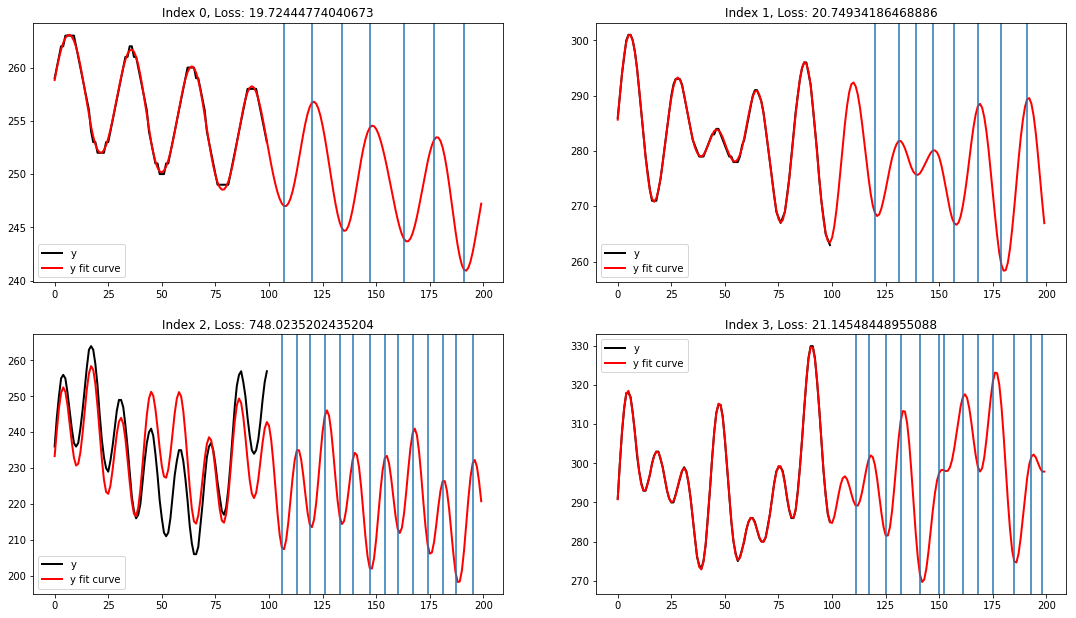

In [3]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
for i,ar in enumerate(arr):
    tt = range(100)
    yy = ar
    axs[i//2,i%2].plot(tt, yy, "-k", label="y", linewidth=2)
    tt = range(200)
    axs[i//2,i%2].plot(tt, fitfuncs[i](tt), "r-", label="y fit curve", linewidth=2)
    axs[i//2,i%2].legend(loc="best")
    axs[i//2,i%2].title.set_text("Index {}, Loss: {}".format(i,losses[i]))
    for res in result[i]:
        if res < 200:
            axs[i//2,i%2].axvline(x=res)
plt.savefig("../../../pic.png")
plt.show()

In [4]:
arr = [[259, 260, 261, 262, 262, 263, 263, 263, 263, 263, 262, 261, 260, 259, 258, 257, 256, 254, 253, 253, 252, 252, 252, 252, 253, 253, 254, 255, 256, 257, 258, 259, 260, 261, 261, 262, 262, 261, 261, 260, 259, 258, 257, 256, 254, 253, 252, 251, 251, 250, 250, 250, 251, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 260, 260, 260, 259, 259, 258, 257, 256, 254, 253, 252, 251, 250, 249, 249, 249, 249, 249, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 258, 258, 258, 258, 257, 256, 255, 254, 253], [286, 290, 294, 297, 300, 301, 301, 300, 298, 295, 291, 287, 283, 279, 276, 273, 271, 271, 271, 273, 275, 278, 281, 284, 287, 290, 292, 293, 293, 293, 292, 290, 288, 286, 284, 282, 281, 280, 279, 279, 279, 280, 281, 282, 283, 283, 284, 284, 283, 282, 281, 280, 279, 279, 278, 278, 278, 279, 281, 282, 284, 286, 288, 290, 291, 291, 290, 289, 287, 284, 281, 278, 275, 272, 269, 268, 267, 268, 269, 272, 275, 279, 283, 287, 290, 293, 295, 296, 296, 294, 292, 288, 284, 280, 275, 271, 268, 265, 264, 263], [236, 244, 250, 255, 256, 255, 251, 246, 241, 237, 236, 237, 241, 246, 252, 258, 263, 264, 263, 259, 253, 245, 238, 233, 230, 229, 232, 236, 241, 246, 249, 249, 247, 242, 236, 229, 222, 218, 216, 217, 220, 226, 232, 237, 240, 241, 239, 234, 228, 221, 216, 212, 211, 212, 216, 222, 228, 232, 235, 235, 232, 227, 221, 214, 209, 206, 206, 208, 214, 220, 227, 233, 236, 237, 235, 231, 226, 222, 218, 217, 219, 224, 231, 239, 247, 253, 256, 257, 254, 250, 244, 239, 235, 234, 235, 238, 243, 249, 254, 257], [291, 300, 308, 314, 318, 318, 317, 313, 308, 302, 298, 295, 293, 293, 295, 297, 300, 302, 303, 303, 301, 299, 296, 293, 291, 290, 290, 292, 294, 296, 298, 299, 298, 295, 291, 286, 281, 276, 274, 273, 275, 279, 286, 293, 301, 308, 313, 315, 315, 312, 306, 299, 292, 285, 280, 277, 275, 276, 278, 280, 283, 285, 286, 286, 285, 283, 281, 280, 280, 281, 284, 287, 291, 295, 298, 299, 299, 298, 295, 291, 288, 286, 286, 288, 293, 299, 306, 314, 321, 327, 330, 330, 327, 321, 314, 306, 298, 292, 287, 285]]
result, losses, fitfuncs = technical_analysis(arr)

Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 1800.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
Optimal parameters not found: Number of calls to function has reached maxfev = 3000.
21.084494683205122
[21.084494683205122]
Optimal parameters not found: Number of calls to function has reached maxfev = 1800.
Optimal parameters not found: Number of calls to function has reached maxfev = 2400.
Optimal parameters not fo

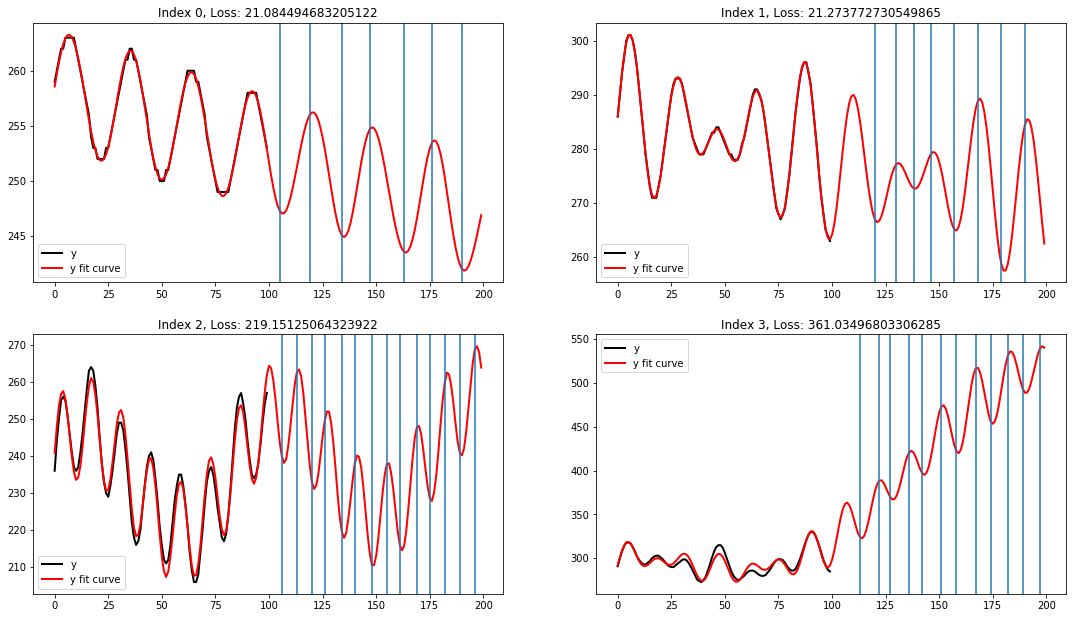

In [5]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
for i,ar in enumerate(arr):
    tt = range(100)
    yy = ar
    axs[i//2,i%2].plot(tt, yy, "-k", label="y", linewidth=2)
    tt = range(200)
    axs[i//2,i%2].plot(tt, fitfuncs[i](tt), "r-", label="y fit curve", linewidth=2)
    axs[i//2,i%2].legend(loc="best")
    axs[i//2,i%2].title.set_text("Index {}, Loss: {}".format(i,losses[i]))
    for res in result[i]:
        if res < 200:
            axs[i//2,i%2].axvline(x=res)
plt.savefig("../../../pic.png")
plt.show()